In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.io import imshow
from skimage.io import imread
from scipy.ndimage import morphology

In [ ]:
# Metriche di validazione

def calculate_metrics(gt, pred):
    tp = np.sum((gt == 1) & (pred == 1))  # True Positives
    tn = np.sum((gt == 0) & (pred == 0))  # True Negatives
    fp = np.sum((gt == 0) & (pred == 1))  # False Positives
    fn = np.sum((gt == 1) & (pred == 0))  # False Negatives

    return tp, tn, fp, fn

def dice_coefficient(gt, pred):
    intersection = np.sum((gt == 1) & (pred == 1))
    return 2 * intersection / (np.sum(gt == 1) + np.sum(pred == 1))

def accuracy(gt, pred):
    tp, tn, fp, fn = calculate_metrics(gt, pred)
    return (tp + tn) / (tp + fn + tn + fp)

def sensitivity(gt, pred):
    tp, _, _, fn = calculate_metrics(gt, pred)  # _ per i valori non utilizzati
    return tp / (tp + fn)

def specificity(gt, pred):
    _, tn, fp, _ = calculate_metrics(gt, pred)
    return tn / (tn + fp)

def center_of_mass(binary_image):
  indices = []
  for i in range(binary_image.shape[0]):
      for j in range(binary_image.shape[1]):
          if binary_image[i, j] != 0:
              indices.append([i, j])
  indices = np.array(indices)
  x_cm = np.mean(indices[:, 0])
  y_cm = np.mean(indices[:, 1])
  return x_cm, y_cm

def jaccard_metod(gt, pred):
    intersection = np.sum((gt == 1) & (pred == 1))
    union = np.sum((gt == 1) | (pred == 1))
    return intersection / union

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MANO.JPG to MANO (3).JPG


<ipython-input-102-50c6bc7327eb>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(mano,cmap='gray')


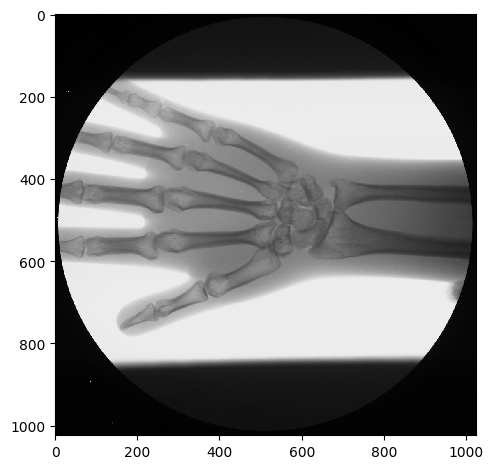

In [ ]:
mano = imread("MANO.JPG")
imshow(mano,cmap='gray')

<ipython-input-103-dfc384c12c88>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(binary_gt, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


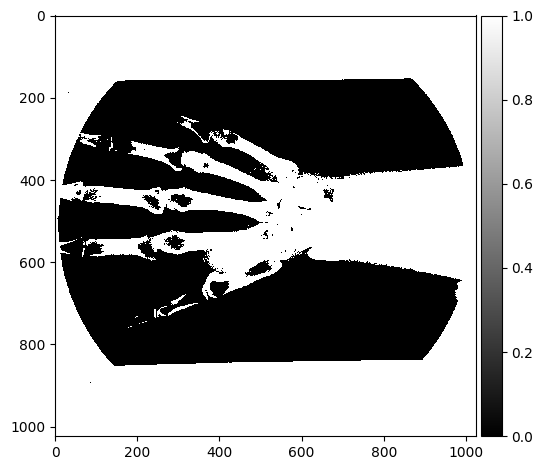

In [ ]:
# Converto in file binario
binary_mano = (mano > 128).astype(int)

binary_mano = 1 - binary_mano

# Carico la ground truth
gt = imread("MANO.JPG", as_gray=True)

# Converto la ground truth in binaria
binary_gt = (gt > 128).astype(int)

binary_gt = 1 - binary_gt

imshow(binary_gt, cmap='gray')

In [ ]:
print("Valori min e max della matrice originale:", binary_gt.min(), binary_gt.max())

Valori min e max della matrice originale: 0 1


In [ ]:
# METODO DI EROSIONE

<ipython-input-106-e889f30e1c3e>:1: DeprecationWarning: Please import `binary_erosion` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  pred_eroded = morphology.binary_erosion(binary_gt, iterations=5).astype(int)
<ipython-input-106-e889f30e1c3e>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(pred_eroded, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


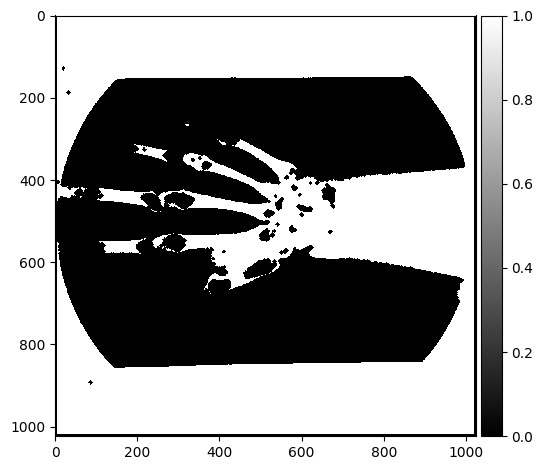

In [ ]:
pred_eroded = morphology.binary_erosion(binary_gt, iterations=5).astype(int)
imshow(pred_eroded, cmap='gray')

In [ ]:
print("Valori min e max della matrice predetta:", pred_eroded.min(), pred_eroded.max())

Valori min e max della matrice predetta: 0 1


In [ ]:
print("Dimensioni della Ground Truth:", binary_gt.shape, "\nDimensioni della Predizione:", pred_eroded.shape)

Dimensioni della Ground Truth: (1024, 1024) 
Dimensioni della Predizione: (1024, 1024)


In [ ]:
tnE = np.sum((binary_gt == 0) & (pred_eroded == 0))
fpE = np.sum((binary_gt == 0) & (pred_eroded == 1))
tpE = np.sum((binary_gt == 1) & (pred_eroded == 1))
fnE= np.sum((binary_gt == 1) & (pred_eroded == 0))
# Calcolo del centro di massa per la ground truth e la previsione
x_gt, y_gt = center_of_mass(binary_gt)
x_predE, y_predE = center_of_mass(pred_eroded)

# Distanza tra i centri di massa
distanceE = np.sqrt((x_gt - x_predE)**2 + (y_gt - y_predE)**2)


In [ ]:
#Prima dell'introduzione dei falsi positivi
print(f"True Negatives (TN): {tnE}\nFalse Positives (FP): {fpE}\nFalse Negatives (FN): {fnE}\nTrue Positives (TP): {tpE}")
print()
print("Specificità:", specificity(binary_gt, pred_eroded))
print()
print("Dice Coefficient:", dice_coefficient(binary_gt, pred_eroded))
print()
print("Indice di Jaccard:", jaccard_metod(binary_gt, pred_eroded))
print()
print("Sensitività:", sensitivity(binary_gt, pred_eroded))
print()
print("Accuratezza:", accuracy(binary_gt, pred_eroded))
print()
print("Centro di Massa GT:", x_gt, y_gt)
print()
print("Centro di Massa PRED:", x_predE, y_predE)
print()
print("Distanza tra i Centri di Massa:", distanceE)

True Negatives (TN): 455750
False Positives (FP): 0
False Negatives (FN): 70948
True Positives (TP): 521878

Specificità: 1.0

Dice Coefficient: 0.9363526101996584

Indice di Jaccard: 0.8803223880194189

Sensitività: 0.8803223880194189

Accuratezza: 0.9323387145996094

Centro di Massa GT: 515.2236474108761 543.8604666461997

Centro di Massa PRED: 518.4948991909987 557.6040760484251

Distanza tra i Centri di Massa: 14.127557736915941


Dimensioni della Predizione ridimensionata: (1004, 1004) 
Dimensioni della Predizione allineata: (1024, 1024)



<ipython-input-111-edd83abb3d7e>:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(reduced_pred, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


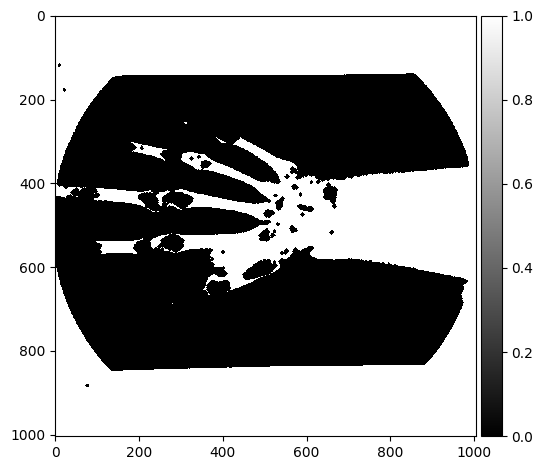

In [ ]:
reduced_pred = pred_eroded[10:-10, 10:-10]  # Rimuove 10 pixel dai bordi
# Riallineo tutto alla dimensione della ground truth
aligned_pred = np.pad(reduced_pred, pad_width=10, mode='constant', constant_values=1)
print("Dimensioni della Predizione ridimensionata:", reduced_pred.shape, "\nDimensioni della Predizione allineata:", aligned_pred.shape)
print()
imshow(reduced_pred, cmap='gray')


In [ ]:
#Stampo i risultati
#parametri
tnE = np.sum((binary_gt == 0) & (aligned_pred == 0))
fpE = np.sum((binary_gt == 0) & (aligned_pred == 1))
fnE = np.sum((binary_gt == 1) & (aligned_pred == 0))
tpE = np.sum((binary_gt == 1) & (aligned_pred == 1))
# Calcolo del centro di massa per la ground truth e la previsione
x_gt, y_gt = center_of_mass(binary_gt)
x_predE, y_predE = center_of_mass(aligned_pred)

# Distanza tra i centri di massa
distanceE = np.sqrt((x_gt - x_predE)**2 + (y_gt - y_predE)**2)

In [ ]:
#Calcolo dei parametri pred con erosione
#dopo dell'introduzione dei falsi positivi
print(f"True Negatives (TN): {tnE}\nFalse Positives (FP): {fpE}\nFalse Negatives (FN): {fnE}\nTrue Positives (TP): {tpE}")
print()
print("Specificità:", specificity(binary_gt, aligned_pred))
print()
print("Dice Coefficient:", dice_coefficient(binary_gt, aligned_pred))
print()
print("Indice di Jaccard:", jaccard_metod(binary_gt, aligned_pred))
print()
print("Sensitività:", sensitivity(binary_gt, aligned_pred))
print()
print("Accuratezza:", accuracy(binary_gt, aligned_pred))
print()
print("Centro di Massa GT:", x_gt, y_gt)
print()
print("Centro di Massa PRED:", x_predE, y_predE)
print()
print("Distanza tra i Centri di Massa:", distanceE)

True Negatives (TN): 455634
False Positives (FP): 116
False Negatives (FN): 50082
True Positives (TP): 542744

Specificità: 0.9997454744925947

Dice Coefficient: 0.9557994022995793

Indice di Jaccard: 0.9153407921854076

Sensitività: 0.9155198995995453

Accuratezza: 0.9521274566650391

Centro di Massa GT: 515.2236474108761 543.8604666461997

Centro di Massa PRED: 518.211216519913 555.2628688796375

Distanza tra i Centri di Massa: 11.787295952608416


In [ ]:
# METODO DI DILATAZIONE

<ipython-input-115-1b1089e33efb>:1: DeprecationWarning: Please import `binary_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  pred_dilated = morphology.binary_dilation(binary_gt, iterations=5).astype(int)
<ipython-input-115-1b1089e33efb>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(pred_dilated, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


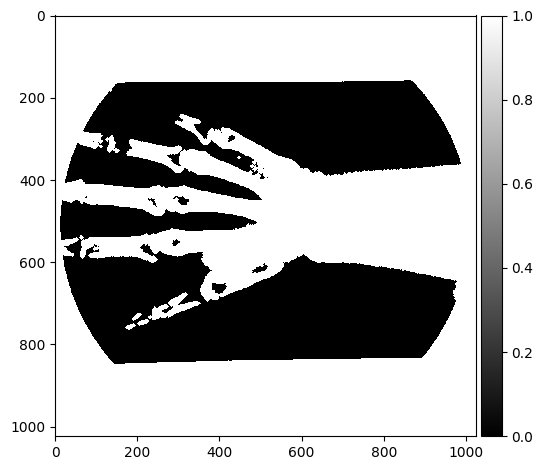

In [ ]:
pred_dilated = morphology.binary_dilation(binary_gt, iterations=5).astype(int)
imshow(pred_dilated, cmap='gray')

In [ ]:
#Stampo i risultati
tnD = np.sum((binary_gt == 0) & (pred_dilated == 0))
fpD = np.sum((binary_gt == 0) & (pred_dilated == 1))
tpD= np.sum((binary_gt == 1) & (pred_dilated == 1))
fnD= np.sum((binary_gt == 1) & (pred_dilated == 0))

# Calcolo del centro di massa per la ground truth e la previsione
x_gt, y_gt = center_of_mass(binary_gt)
x_predD, y_predD = center_of_mass(pred_dilated)

# Distanza tra i centri di massa
distanceD = np.sqrt((x_gt - x_predD)**2 + (y_gt - y_predD)**2)

In [ ]:
# Prima dell'introduzione dei falsi negativi
# Calcolo dei parametri pred con dilatazione
print(f"True Negatives (TN): {tnD}\nFalse Positives (FP): {fpD}\nFalse Negatives (FN): {fnD}\nTrue Positives (TP): {tpD}")
print()
print("Specificità:", specificity(binary_gt, pred_dilated))
print()
print("Dice Coefficient:", dice_coefficient(binary_gt, pred_dilated))
print()
print("Indice di Jaccard:", jaccard_metod(binary_gt, pred_dilated))
print()
print("Sensitività:", sensitivity(binary_gt, pred_dilated))
print()
print("Accuratezza:", accuracy(binary_gt, pred_dilated))
print()
print("Centro di Massa GT:", x_gt, y_gt)
print()
print("Centro di Massa PRED:", x_predD, y_predD)
print()
print("Distanza tra i Centri di Massa:", distanceD)

True Negatives (TN): 404336
False Positives (FP): 51414
False Negatives (FN): 0
True Positives (TP): 592826

Specificità: 0.8871881513987931

Dice Coefficient: 0.9584387575117254

Indice di Jaccard: 0.92019433751397

Sensitività: 1.0

Accuratezza: 0.9509677886962891

Centro di Massa GT: 515.2236474108761 543.8604666461997

Centro di Massa PRED: 512.7272150130386 531.6751707438222

Distanza tra i Centri di Massa: 12.43839261904334


In [ ]:
# Riduco la dimensione della predizione (introduzione di falsi negativi)
reduced_predD = pred_dilated[10:-10, 10:-10]  # Rimuove 10 pixel dai bordi

# Riallinea alla dimensione della ground truth
aligned_predD = np.pad(reduced_predD, pad_width=10, mode='constant', constant_values=0)
tnD = np.sum((binary_gt == 0) & (aligned_predD == 0))
fpD = np.sum((binary_gt == 0) & (aligned_predD == 1))
tpD= np.sum((binary_gt == 1) & (aligned_predD == 1))
fnD= np.sum((binary_gt == 1) & (aligned_predD == 0))

In [ ]:
# Dopo dell'introduzione dei falsi negativi
print(f"True Negatives (TN): {tnD}\nFalse Positives (FP): {fpD}\nFalse Negatives (FN): {fnD}\nTrue Positives (TP): {tpD}")
print()
print("Specificità:", specificity(binary_gt, aligned_predD))
print()
print("Dice Coefficient:", dice_coefficient(binary_gt, aligned_predD))
print()
print("Indice di Jaccard:", jaccard_metod(binary_gt, aligned_predD))
print()
print("Sensitività:", sensitivity(binary_gt, aligned_predD))
print()
print("Accuratezza:", accuracy(binary_gt, aligned_predD))
print()
print("Centro di Massa GT:", x_gt, y_gt)
print()
print("Centro di Massa PRED:", x_predD, y_predD)
print()
print("Distanza tra i Centri di Massa:", distanceD)

True Negatives (TN): 404452
False Positives (FP): 51298
False Negatives (FN): 40444
True Positives (TP): 552382

Specificità: 0.8874426769061986

Dice Coefficient: 0.9233250815290521

Indice di Jaccard: 0.8575709024970347

Sensitività: 0.9317776210894934

Accuratezza: 0.9125080108642578

Centro di Massa GT: 515.2236474108761 543.8604666461997

Centro di Massa PRED: 512.7272150130386 531.6751707438222

Distanza tra i Centri di Massa: 12.43839261904334


In [ ]:
# METODO RANDOMICO pred_RANDOM

In [ ]:
pred_RANDOM = np.random.randint(0, 2, size=mano.shape)
print("Valori min e max della matrice pred:", pred_RANDOM.min(), pred_RANDOM.max())

Valori min e max della matrice pred: 0 1


In [ ]:
# Calcolo del centro di massa per la ground truth e la previsione
x_gt, y_gt = center_of_mass(binary_gt)
x_pred_RANDOM, y_pred_RANDOM = center_of_mass(pred_RANDOM)

# Distanza tra i centri di massa
distance_RANDOM = np.sqrt((x_gt - x_pred_RANDOM)**2 + (y_gt - x_pred_RANDOM)**2)

In [ ]:
print("Indice di Jaccard:", jaccard_metod(binary_gt, pred_RANDOM))
print()
print("Accuratezza:", accuracy(binary_gt, pred_RANDOM))
print()
print("Sensitività:", sensitivity(binary_gt, pred_RANDOM))
print()
print("Dice Coefficient:", dice_coefficient(binary_gt, pred_RANDOM))
print()
print("Specificity:", specificity(binary_gt, pred_RANDOM))
print()
print("Centro di Massa GT:", x_gt, y_gt)
print()
print("Centro di Massa PRED:", x_pred_RANDOM, y_pred_RANDOM)
print()
print("Distanza tra i Centri di Massa:", distance_RANDOM)

Indice di Jaccard: 0.36155608916373366

Accuratezza: 0.5002250671386719

Sensitività: 0.5006106344863417

Dice Coefficient: 0.5310924640435504

Specificity: 0.49972353263850794

Centro di Massa GT: 515.2236474108761 543.8604666461997

Centro di Massa PRED: 511.4528465478604 511.61772451484063

Distanza tra i Centri di Massa: 32.62625904983292
